Importing important libraries

In [1]:
import numpy as np
import scipy as sp
from scipy import signal
import pandas as pd

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

Import data through pandas 

In [2]:
path = "../data_analysis/"
file_name = path + "imuWed_Feb_14_setup2.csv" #"Right_to_left_paralle_to_earth.csv"
data_file = pd.read_csv(file_name, sep=',',header=0);

In [3]:
data_file.head()

,timestamp,orientation_x,orientation_y,orientation_z,orientation_w,AccX,AccY,AccZ,GyroX,GyroY,...,arm_synched,device_direction,warmupState,synced,battery_level,rssi,bluetooth_strength,player_hand,swing_type,stroke_type
0,1518638410850,-0.112122,-0.229004,-0.477966,0.840576,0.397949,0.202148,0.726562,-13.6250,20.1250,...,False,NaN,NaN,NaN,-1,0,0,right_handed,topspin,forehand
1,1518638410860,-0.113892,-0.227661,-0.479980,0.839539,0.490234,0.119141,0.673340,-21.6875,8.4375,...,False,NaN,NaN,NaN,-1,0,0,right_handed,topspin,forehand
2,1518638410875,-0.119385,-0.223694,-0.481934,0.838684,0.544922,-0.126953,0.754883,-31.7500,11.5000,...,False,NaN,NaN,NaN,-1,0,0,right_handed,topspin,forehand
3,1518638410899,-0.119263,-0.219421,-0.484497,0.838379,0.432617,-0.065430,0.811035,-10.1875,21.1250,...,False,NaN,NaN,NaN,-1,0,0,right_handed,topspin,forehand
4,1518638410920,-0.117676,-0.214355,-0.488403,0.837646,0.340820,0.114258,0.862305,-18.0625,22.8750,...,False,NaN,NaN,NaN,-1,0,0,right_handed,topspin,forehand


In [4]:
time = data_file['timestamp'];
gyrX = data_file['GyroX'];
gyrY = data_file['GyroY'];
gyrZ = data_file['GyroZ'];
accX = data_file['AccX'] ;
accY = data_file['AccY'];
accZ = data_file['AccZ'];
quaternion = data_file[['orientation_w', 'orientation_x', 'orientation_y', 'orientation_z']]


In [5]:
##Find magnitude of accelerometer(x,y,z) = sqrt(x*x +y*y+ z*z)

acc_mag = np.sqrt(accX * accX + accY * accY + accZ * accZ);
print (accX[0] * accX[0]) 
print (accY[0] * accY[0]) 
print (accZ[0] * accZ[0])



0.15836358070373535
0.040863990783691406
0.52789306640625


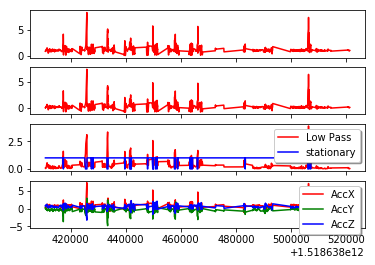

In [14]:

### this can help us detect the stroke itself.
## need to meet a professor from Electrical Department, who can help us understand this part

#HP filter accelerometer data

filtCutOff = .001;
sampleFrequecy = 50;
number_of_pass = 1

b, a =  signal.butter(number_of_pass, (2*filtCutOff) / sampleFrequecy, 'high', analog=False)
acc_magFilt = signal.filtfilt(b, a, acc_mag)

f, (ax4, ax1, ax2, ax3) = plt.subplots(4, sharex=True)
ax4.plot(time, acc_mag, 'r', label="Magnitude");

ax1.plot(time, acc_magFilt, 'r', label="High Pass");
#ax2.plot(time[250:500], stationary[250:500], 'b', label="stationary");
#ax1.xlabel('Time (s)');
#ax1.ylabel('Angular velocity (^\circ/s)');


# Compute absolute value
acc_magFilt = np.absolute(acc_magFilt);

# LP filter accelerometer data
filtCutOff = 5.0;
b, a = signal.butter(number_of_pass, (2*(filtCutOff)/ (sampleFrequecy)), 'low')
acc_magFilt = signal.filtfilt(b, a, acc_magFilt)


stationary = acc_magFilt < .9;




ax2.plot(time, acc_magFilt, 'r', label="Low Pass");
ax2.plot(time, stationary, 'b', label="stationary");
#ax2.xlabel('Time (s)');
#ax2.ylabel('Angular velocity (^\circ/s)');



#stationary = acc_magFilt < 0.5; ### this can help us detect the 
ax2.legend(shadow=True, fancybox=True, loc="upper right");


ax3.plot(time, accX, 'r');
ax3.plot(time, accY, 'g');
ax3.plot(time, accZ, 'b');
#ax3.plot(time[1:500], acc_mag[1:500], 'm');
#ax3.xlabel('Time (s)');
#ax3.ylabel('Angular velocity (^\circ/s)');
ax3.legend(shadow=True, fancybox=True, loc="upper right");



 ### this can help us detect the 





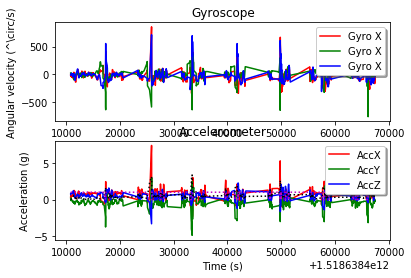

In [7]:
plt.figure('Position');
plt.subplot(211);
plt.plot(time[:-1000], gyrX[:-1000], 'r', label="Gyro X");
plt.plot(time[:-1000], gyrY[:-1000], 'g', label="Gyro X");
plt.plot(time[:-1000], gyrZ[:-1000], 'b', label="Gyro X");
plt.title('Gyroscope');
plt.xlabel('Time (s)');
plt.ylabel('Angular velocity (^\circ/s)');
plt.legend(shadow=True, fancybox=True, loc="upper right");
plt.subplot(212);
plt.plot(time[:-1000], accX[:-1000], 'r');
plt.plot(time[:-1000], accY[:-1000], 'g');
plt.plot(time[:-1000], accZ[:-1000], 'b');
plt.plot(time[:-1000], acc_magFilt[:-1000], ':k');
plt.plot(time[:-1000], stationary[:-1000], ':m');
#plt.plot(time, stationary, 'k', 'LineWidth', 2);
plt.title('Accelerometer');
plt.xlabel('Time (s)');
plt.ylabel('Acceleration (g)');
plt.legend(shadow=True, fancybox=True, loc="upper right");


In [8]:
# Convert acceleration measurements to m/s/s
'''quaternion
# Plot translational accelerations
plt.figure('Accelerations');
plt.plot(time[1:100], acc['orientation_x'][1:100], 'r');
plt.plot(time[1:100], acc['orientation_y'][1:100], 'g');
plt.plot(time[1:100], acc['orientation_z'][1:100], 'b');
plt.title('Acceleration');
plt.xlabel('Time (s)');
plt.ylabel('Acceleration (m/s/s)');
plt.legend(shadow=True, fancybox=True, loc="upper right");'''

'quaternion\n# Plot translational accelerations\nplt.figure(\'Accelerations\');\nplt.plot(time[1:100], acc[\'orientation_x\'][1:100], \'r\');\nplt.plot(time[1:100], acc[\'orientation_y\'][1:100], \'g\');\nplt.plot(time[1:100], acc[\'orientation_z\'][1:100], \'b\');\nplt.title(\'Acceleration\');\nplt.xlabel(\'Time (s)\');\nplt.ylabel(\'Acceleration (m/s/s)\');\nplt.legend(shadow=True, fancybox=True, loc="upper right");'

In [41]:
def quaternProd(a, b):
    ab = np.zeros(a.shape);
    ab[:,0] = a[:,0]*b[:,0] - a[:,1]*b[:,1] - a[:,2]*b[:,2] - a[:,3]*b[:,3];
    ab[:,1] = a[:,0]*b[:,1] + a[:,1]*b[:,0] + a[:,2]*b[:,3] - a[:,3]*b[:,2];
    ab[:,2] = a[:,0]*b[:,2] - a[:,1]*b[:,3] + a[:,2]*b[:,0] + a[:,3]*b[:,1];
    ab[:,3] = a[:,0]*b[:,3] + a[:,1]*b[:,2] - a[:,2]*b[:,1] + a[:,3]*b[:,0];
    return ab;

def quaternConj(q):
    ab = np.zeros(q.shape);
    ab[:,0] = q[:,0]
    ab[:,1] = -q[:,1]
    ab[:,2] = -q[:,2]
    ab[:,3] = -q[:,3]
    return ab

def quaternRotate(v, q):
    (row, col) = v.shape;
    acc = np.append(np.zeros((row,1)), v, 1)
    #print acc[1:5]
    v0XYZ = quaternProd(quaternProd(q, acc), quaternConj(q));
    return v0XYZ[:, 1:4];

In [42]:
#Compute translational accelerations

accelerometer = data_file.as_matrix(['AccX', 'AccY', 'AccZ'])
quat = quaternion.as_matrix()

##Rotate body accelerations to Earth frame
acc = quaternRotate( accelerometer, quaternConj(quat));

#Convert acceleration measurements to m/s/s
#acc = acc * 9.81;




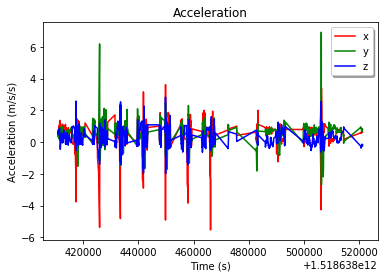

In [43]:
plt.figure('Accelerations');
plt.plot(time, acc[:,0], 'r', label="x");
plt.plot(time, acc[:,1], 'g', label="y");
plt.plot(time, acc[:,2], 'b', label="z");
plt.title('Acceleration');
plt.xlabel('Time (s)');
plt.ylabel('Acceleration (m/s/s)');
plt.legend(shadow=True, fancybox=True, loc="upper right");

In [44]:
stationary_diff = np.diff(stationary)

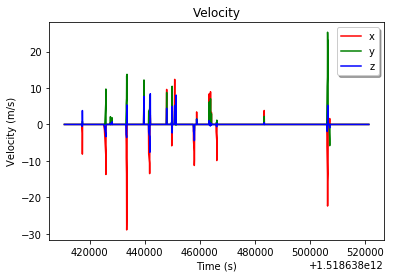

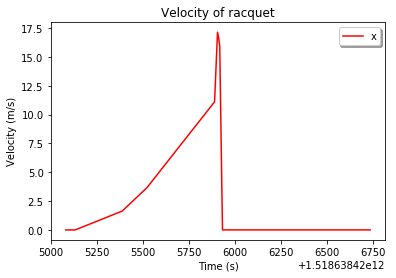

In [104]:
#removing earth's gravity(default ) from z axis

#acc[:,2] = acc[:,2] - 9.81;
#samplePeriod = 50;

#Integrate acceleration to yield velocity
vel = np.zeros(acc.shape);
for t in range(1,len(vel)):
    vel[t,:] = vel[t - 1,:] + acc[t,:]# * samplePeriod;
    if(stationary[t] == 1):
        vel[t,:] = [0, 0, 0];     # force zero velocity when foot stationary
    
velDrift = np.zeros(vel.shape);



'''stationaryStart = find([0; diff(stationary)] == -1);
stationaryEnd = find([0; diff(stationary)] == 1);
for i = 1:numel(stationaryEnd)
    driftRate = vel(stationaryEnd(i)-1, :) / (stationaryEnd(i) - stationaryStart(i));
    enum = 1:(stationaryEnd(i) - stationaryStart(i));
    drift = [enum'*driftRate(1) enum'*driftRate(2) enum'*driftRate(3)];
    velDrift(stationaryStart(i):stationaryEnd(i)-1, :) = drift;
end'''
    

             
plt.figure('Velocity');
plt.plot(time, vel[:,0], 'r', label="x");
plt.plot(time, vel[:,1], 'g', label="y");
plt.plot(time, vel[:,2], 'b', label="z");
plt.title('Velocity');
plt.xlabel('Time (s)');
plt.ylabel('Velocity (m/s)');
plt.legend(shadow=True, fancybox=True, loc="upper right");

velocity_norm =  np.linalg.norm(vel, axis=1)


plt.figure('Velocity max');
plt.plot(time[500:550], velocity_norm[500:550], 'r', label="x");
plt.title('Velocity of racquet');
plt.xlabel('Time (s)');
plt.ylabel('Velocity (m/s)');
plt.legend(shadow=True, fancybox=True, loc="upper right");


In [59]:
print stationary_diff

[0 0 0 ... 0 0 0]


In [48]:
print velocity_resultant

271.1079151271879


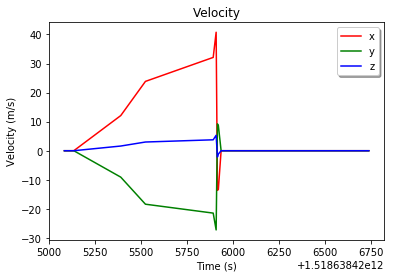

In [103]:
stationary_diff = np.diff(stationary+0)
stationaryStart = np.where(stationary_diff == -1)[0]
stationaryEnd = np.where(stationary_diff == 1)[0]
velDrift = np.zeros(vel.shape);
for i in range(0, len(stationaryEnd)):
    rateDiff = (stationaryEnd[i] - stationaryStart[i])
    driftRate = np.divide(vel[stationaryEnd[i] - 1, :], rateDiff)
    enum = np.arange(0, (stationaryEnd[i] - stationaryStart[i])-1);
    enum = np.array([enum, enum, enum])
    drift = enum.T * driftRate
    velDrift[stationaryStart[i]:stationaryEnd[i]-1, :] = drift;

vel = vel - velDrift;             
plt.figure('Velocity');
plt.plot(time[500:550], vel[500:550,0], 'r', label="x");
plt.plot(time[500:550], vel[500:550,1], 'g', label="y");
plt.plot(time[500:550], vel[500:550,2], 'b', label="z");
plt.title('Velocity');
plt.xlabel('Time (s)');
plt.ylabel('Velocity (m/s)');
plt.legend(shadow=True, fancybox=True, loc="upper right");

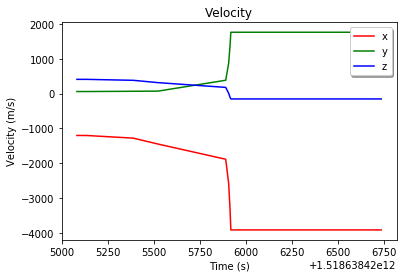

In [109]:
# Compute translational position
# Integrate velocity to yield position


pos = np.zeros(vel.shape);
for t in range(2, len(pos)):
    pos[t] = pos[t-1] + vel[t];    # integrate velocity to yield position

    
    
             
plt.figure('Position');
plt.plot(time[500:550], pos[500:550,0], 'r', label="x");
plt.plot(time[500:550], pos[500:550,1], 'g', label="y");
plt.plot(time[500:550], pos[500:550,2], 'b', label="z");
plt.title('Velocity');
plt.xlabel('Time (s)');
plt.ylabel('Velocity (m/s)');
plt.legend(shadow=True, fancybox=True, loc="upper right");

In [89]:
enum = np.arange(0, (stationaryEnd[0] - stationaryStart[0]));

In [90]:
print enum

[0 1 2 3]
